TASK 1 - PRE PROCESSING

In [1]:
#run this program on the same level with folders spam, easy_ham and hard ham

In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
def load_text(folder_name):
    '''
    iterates over folder and loads all email texts to the list
    Args:
        folder_name (str)
    Returns:
        list_of_text (list)
    '''

    list_of_text = list()
    current_path = os.getcwd() + '/' + folder_name
    for file_ in os.listdir(folder_name):
        file_path = os.path.join(current_path, file_)
        f = open(file_path, 'rb')
        text = (f.read())
        #removing punctuation and new line symbols from the texts
        list_of_text.append(re.sub("[,.:;!]", "", str(text).replace('\\n', '')))
    return list_of_text

In [3]:
# loading the texts from folders named as "easy_ham", "hard_ham", "spam"
easy_ham = load_text('easy_ham')
hard_ham = load_text('hard_ham')
spam = load_text('spam')
# merge easy_ham and ham
ham = easy_ham + hard_ham

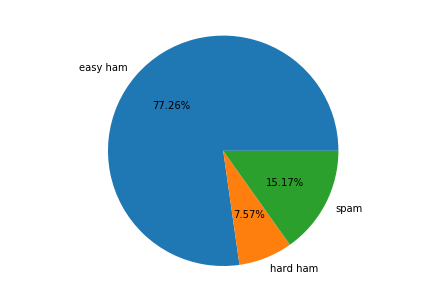

In [4]:
pie_data = [float(len(easy_ham)), float(len(hard_ham)), float(len(spam))]
pie_label = ['easy ham', 'hard ham', 'spam']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(pie_data, labels = pie_label, autopct='%1.2f%%')
plt.savefig('pie_plot.png')
plt.show()

TASK 2 and 3

In [5]:
def testSpamMultiOrBern(ham, spam, model_type, stopWords = None, title=None):  
    '''
    Train and classify spam and ham emails using either multinomial or bernoulli naive bayes
    Args:
        ham (list): list of ham emails
        spam (list): list of spam emails
        model_type (char): 'M' (multinomial) or 'B' (bernouilli)
        stopWords (string): None by default 
        title (string): title for confusion matrix
    '''

    hamTrain, hamTest = train_test_split(ham, random_state=10)
    spamTrain, spamTest = train_test_split(spam, random_state=10)  
    #Combine the train and test sets
    train = hamTrain + spamTrain
    test = hamTest + spamTest
    #List containing the labels of both the train and test set
    trainLabels = [0]*len(hamTrain)+[1]*len(spamTrain)
    testTrueLabels = [0]*len(hamTest)+[1]*len(spamTest)
    #Vectorize the train and test set
    vectorizer = CountVectorizer(decode_error='ignore', stop_words=stopWords)
    xTrain = vectorizer.fit_transform(train)
    xTest = vectorizer.transform(test)

    if model_type == 'M':
        naiBay = MultinomialNB(alpha=1.0e-10)
    elif model_type == 'B':
        naiBay=BernoulliNB(binarize=0.5,alpha=1.0e-10)
    else:
        print("Error!!!. Please use M (Multinomial) or B (Bernoulli) as model type")
        return

   
    naiBay.fit(xTrain.toarray(),trainLabels)
    testResult = naiBay.predict(xTest.toarray())
    true_negative, false_positive, false_negative, true_positive =\
                     confusion_matrix(testTrueLabels, testResult).ravel()

    disp = plot_confusion_matrix(naiBay, xTest, testTrueLabels)    
    disp.ax_.set_title(title)

    return naiBay
    # print(f"Rate of false negatives : {false_negative/len(testResult)*100:.1f} %")

Multinomial prediction for easy ham and spam


Bernoulli prediction for easy ham and spam



BernoulliNB(alpha=1e-10, binarize=0.5, class_prior=None, fit_prior=True)

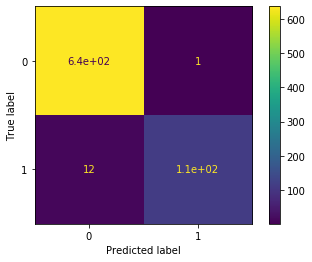

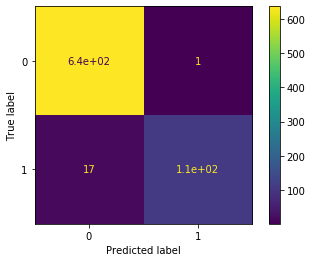

In [12]:
print("Multinomial prediction for easy ham and spam\n")
testSpamMultiOrBern(easy_ham, spam, 'M')
print("\nBernoulli prediction for easy ham and spam\n")
testSpamMultiOrBern(easy_ham, spam, 'B')
# print("\nMultinomial prediction for hard ham and spam\n")
# testSpamMultiOrBern(hard_ham, spam, 'M')
# print("\nBernoulli prediction for hard ham and spam\n")
# testSpamMultiOrBern(hard_ham, spam, 'B')

TASK 4

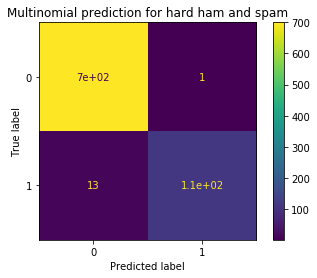

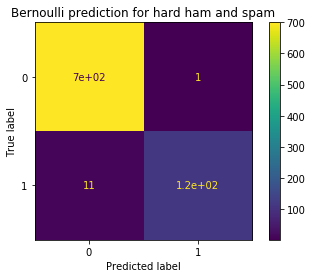

In [7]:
#Now we use count vectorizer stop words parameter to filter out stop words in english from the texts
print("Multinomial prediction for easy ham and spam\n")
testSpamMultiOrBern(easy_ham, spam, 'M', stopWords='english')
print("\nBernoulli prediction for easy ham and spam\n")
testSpamMultiOrBern(easy_ham, spam, 'B', stopWords='english')
print("\nMultinomial prediction for hard ham and spam\n")
testSpamMultiOrBern(hard_ham, spam, 'M', stopWords='english')
print("\nBernoulli prediction for hard ham and spam\n")
testSpamMultiOrBern(hard_ham, spam, 'B', stopWords='english')

TASK 5

In [8]:
# we use one line for loops and split method to filter out headers
easy_ham = [text.split("Content-Transfer-Encoding")[-1].split("Date")[-1] for text in easy_ham]
hard_ham = [text.split("Content-Transfer-Encoding")[-1].split("Date")[-1] for text in hard_ham]
spam = [text.split("Content-Transfer-Encoding")[-1].split("Date")[-1] for text in spam]

BernoulliNB(alpha=1e-10, binarize=0.5, class_prior=None, fit_prior=True)

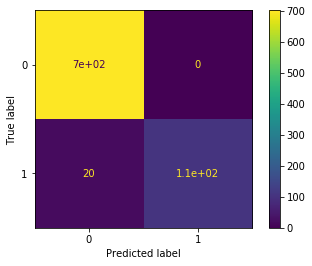

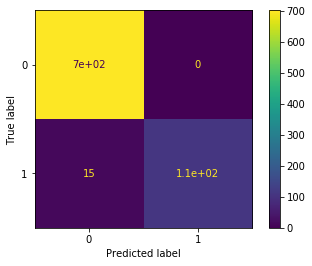

In [9]:
print("Multinomial prediction for easy ham and spam\n")
testSpamMultiOrBern(easy_ham, spam, 'M', stopWords='english')
print("\nBernoulli prediction for easy ham and spam\n")
testSpamMultiOrBern(easy_ham, spam, 'B', stopWords='english')
print("\nMultinomial prediction for hard ham and spam\n")
testSpamMultiOrBern(hard_ham, spam, 'M', stopWords='english')
print("\nBernoulli prediction for hard ham and spam\n")
testSpamMultiOrBern(hard_ham, spam, 'B', stopWords='english')